# Complex Intersection Consolidation

In [6]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

Complete graph for driving.

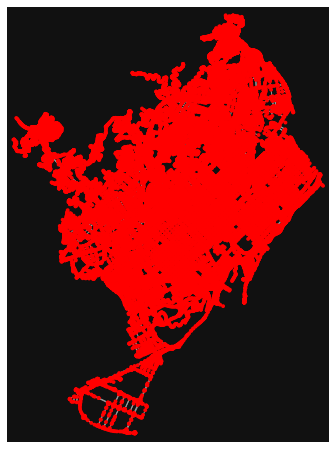

In [12]:
G_drive_complex = ox.graph_from_place('Barcelona, Spain', network_type = 'drive',simplify = False)
fig, ax = ox.plot_graph(G_drive_complex, node_color= 'r')

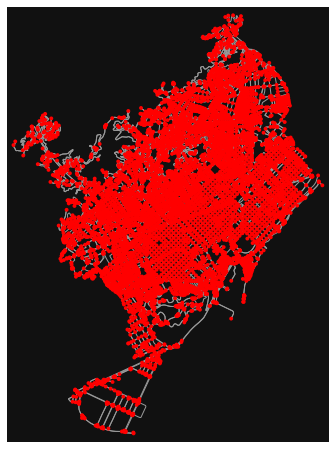

In [2]:
G_drive = ox.graph_from_place('Barcelona, Spain', network_type = 'drive')
fig, ax = ox.plot_graph(G_drive, node_color = 'r')

In [3]:
G_drive_proj = ox.project_graph(G_drive)

In [14]:
# Consolidate intersections which have more than one node with in 15 m
intersections = ox.consolidate_intersections(G_drive_proj, rebuild_graph=False, tolerance=15, dead_ends=False)

In [15]:
print(len(intersections))
print(len(G_drive))

5856
8810


In [4]:
# To apply that into our graph we must set the variable rebuild_graph to True
G_drive_simplified = ox.consolidate_intersections(G_drive_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G_drive_simplified)

5964

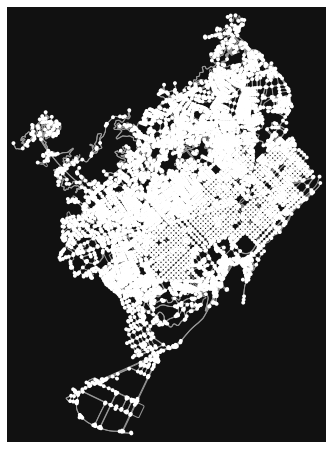

In [5]:
fig, ax = ox.plot_graph(G_drive_simplified, node_color='w')

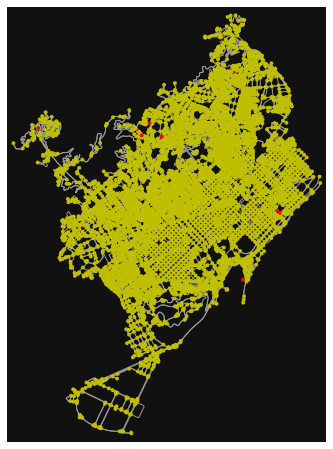

In [21]:
# plot the simplified network and highlight any self-loop edges
loops = [edge[0] for edge in nx.selfloop_edges(G_drive_simplified)]
nc = ['r' if node in loops else 'y' for node in G_drive_simplified.nodes()]
fig, ax = ox.plot_graph(G_drive_simplified, node_color=nc)

## Same Process in a zoomed area

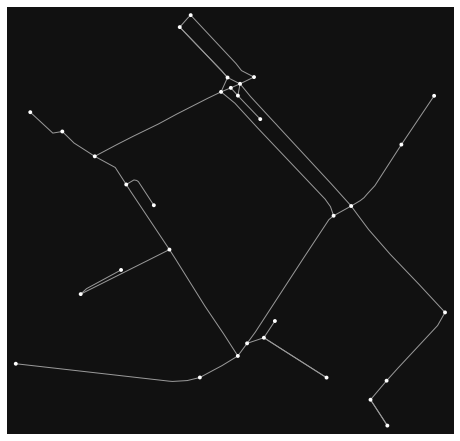

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [71]:
G_zoom_walk = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'bike')
ox.plot_graph(G_zoom_walk)

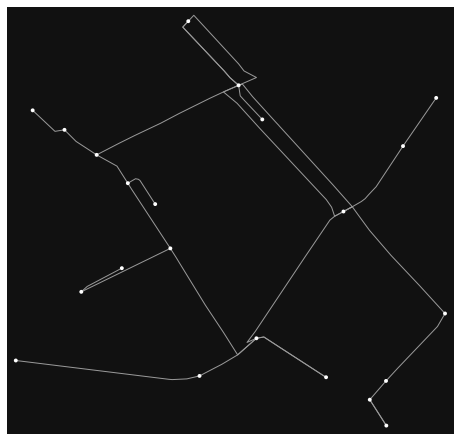

In [72]:
# Simplify the graph
G_zoom_walk_simp = ox.consolidate_intersections(ox.project_graph(G_zoom_walk), rebuild_graph=True, tolerance=10, dead_ends=True)
ax, fig = ox.plot_graph(G_zoom_walk_simp)


In [89]:
nodes, edges = ox.graph_to_gdfs(G_zoom_walk)
edges = edges.dropna(axis=1, how='any') 
edges

,osmid,oneway,highway,length,geometry,u,v,key
0,20355312,True,secondary,14.315,"LINESTRING (2.17013 41.38575, 2.17024 41.38585)",26057116,2853451267,0
1,"[126304603, 603022119]",True,secondary,115.733,"LINESTRING (2.17013 41.38575, 2.17000 41.38590...",26057116,1126640615,0
2,4809709,True,pedestrian,22.785,"LINESTRING (2.17177 41.38555, 2.17159 41.38539)",30254311,2920486742,0
3,140001504,True,secondary,53.755,"LINESTRING (2.17193 41.38749, 2.17229 41.38789)",71710262,71710260,0
4,251733667,True,secondary,39.955,"LINESTRING (2.16972 41.38557, 2.16988 41.38564...",104431832,26057116,0
5,68506242,True,secondary,169.707,"LINESTRING (2.16770 41.38569, 2.16938 41.38554...",112382699,104431832,0
6,140001534,True,secondary,18.393,"LINESTRING (2.17118 41.38690, 2.17138 41.38698)",211637737,216350784,0
7,"[560770197, 20045639]",True,service,154.102,"LINESTRING (2.17118 41.38690, 2.17115 41.38698...",211637737,1362900007,0
8,"[20045755, 295263590, 295263591]",True,secondary,151.175,"LINESTRING (2.17138 41.38698, 2.17120 41.38713...",216350784,2494469623,0
9,140001504,True,secondary,73.582,"LINESTRING (2.17138 41.38698, 2.17148 41.38703...",216350784,71710262,0


In [ ]:
G_zoom_drive = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 1000, network_type = 'drive')
ox.plot_graph(G_zoom_drive)

In [ ]:
# Simplify the graph
G_zoom_drive_simp = ox.consolidate_intersections(ox.project_graph(G_zoom_drive), rebuild_graph=True, tolerance=15, dead_ends=True)
ax, fig = ox.plot_graph(G_zoom_drive_simp)


In [156]:
print(len(G_zoom_drive.edges))
print(len(G_zoom_drive_simp.edges))

694
577


In [174]:
intersections = ox.consolidate_intersections(ox.project_graph(G_zoom_drive), rebuild_graph=False, tolerance=15, dead_ends=False)
intersections

0      POINT (431378.121 4581043.835)
1      POINT (431229.287 4581056.005)
2      POINT (431398.827 4581077.447)
3      POINT (429651.768 4581131.701)
4      POINT (431163.702 4581130.833)
                    ...              
271    POINT (430609.959 4582160.248)
272    POINT (429737.032 4582192.964)
273    POINT (430115.108 4582188.808)
274    POINT (429928.422 4582194.209)
275    POINT (430349.249 4582212.443)
Length: 276, dtype: geometry

## Try to perform routes

15
1


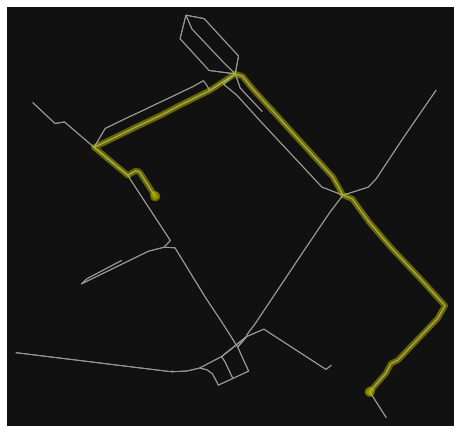

In [63]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G_zoom_walk_simp)[randint(0,len(G_zoom_walk_simp)-1)]
dest = list(G_zoom_walk_simp)[randint(0,len(G_zoom_walk_simp)-1)]
orig = 15
dest = 1
print(orig)
print(dest)
try:
    route = ox.shortest_path(G_zoom_walk_simp, orig,dest, weight='length')
    fig, ax = ox.plot_graph_route(G_zoom_walk_simp, route, route_color='y', route_linewidth=6, node_size=0)
except:
    print("no path to", dest)
    # Try to get the closest node 
    

In [88]:
G_zoom_walk_simp.nodes[2]

{'y': 4581871.41641044,
 'x': 430736.50156874233,
 'osmid': 2920486742,
 'lon': 2.1715896,
 'lat': 41.3853893}

In [44]:
len(G_zoom_walk_simp)

16